In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [67]:
# Load and split data
data = load_breast_cancer()
X,y = data['data'],data['target']

In [68]:
# Custom train test split
def train_test_divide(X,y,test_size=0.3,random_state=42):
    np.random.seed(random_state)
    train_size = 1 - test_size
    arr_rand = np.random.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand,(100*train_size))
    
    X_train = X[split]
    y_train = y[split]
    X_test =  X[~split]
    y_test = y[~split]
    
    return X_train, X_test, y_train, y_test 

def precision_recall_acc(y_true,y_pred,model):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    
    precision = round(TP / (TP+FP),2)
    recall = round(TP / (TP+FN),2)
    accuracy = round((model.predict(X_test) == y_test).mean(),2)
    
    print('Precision: ' + str(precision))
    print('Recall: ' + str(recall))
    print('Accuracy: ' + str(accuracy))

In [69]:
X_train,X_test,y_train,y_test = train_test_divide(X,y,test_size=0.3,random_state=42)

In [70]:
class LogReg:
    def __init__(self,X,y):
        self.X = X
        self.y = y
        self.m = len(y)
        self.bgd = False
        
        
    def sigmoid(self,z):
        return 1/ (1 + np.exp(-z))
    
    def cost_function(self,X,y):
        h = self.sigmoid(X.dot(self.thetas.T))
        m = len(y)
        J = (1/m) * (-y.dot(h) - (1-y).dot(np.log(1-h)))
        return J

    def add_intercept_term(self,X):
        X = np.insert(X,0,np.ones(X.shape[0:1]),axis=1).copy()
        return X
        
    def feature_scale(self,X):
        X = (X - X.mean()) / (X.std())
        return X
    
    def initialise_thetas(self):
        np.random.seed(42)
        self.thetas = np.random.rand(self.X.shape[1])

        
    def normal_equation(self):
        A = np.linalg.inv(np.dot(self.X.T,self.X))
        B = np.dot(self.X.T,self.y)
        thetas = np.dot(A,B)
        return thetas
    
    def batch_gradient_descent(self,alpha,n_iterations):
        self.cost_history = [0] * (n_iterations)
        self.n_iterations = n_iterations
        
        for i in range(n_iterations):
            h = self.sigmoid(np.dot(self.X,self.thetas.T))
            gradient = alpha * (1/self.m) * (h - self.y).dot(self.X)
            self.thetas = self.thetas - gradient
            self.cost_history[i] = self.cost_function(self.X,self.y)
        
        return self.thetas
    
    
    def fit(self,bgd=False,alpha=0.4,n_iterations=2000):
        self.X = self.feature_scale(self.X)
        if bgd == False:
            self.add_intercept_term(self.X)
            self.thetas = self.normal_equation()
        else:
            self.bgd = True
            self.add_intercept_term(self.X)
            self.initialise_thetas()
            
            self.thetas = self.batch_gradient_descent(alpha,n_iterations)
            
    def plot_cost_function(self):
        
        if self.bgd == True:
            plt.plot(range((self.n_iterations)),self.cost_history)
            plt.xlabel('No. of iterations')
            plt.ylabel('Cost Function')
            plt.title('Gradient Descent Cost Function Line Plot')
            plt.show()
        else:
            print('Batch Gradient Descent was not used!')
            
    def predict(self,X_test):
        self.X_test = X_test.copy()
        self.X_test = self.feature_scale(self.X_test)
        h = self.sigmoid(np.dot(self.X_test,self.thetas.T))
        predictions = (h >= 0.5).astype(int)
        return predictions

In [71]:
log_reg_norm = LogReg(X_train,y_train)
log_reg_norm.fit(bgd=False)
precision_recall_acc(y_test,log_reg_norm.predict(X_test),log_reg_norm)

Precision: 0.79
Recall: 1.0
Accuracy: 0.82


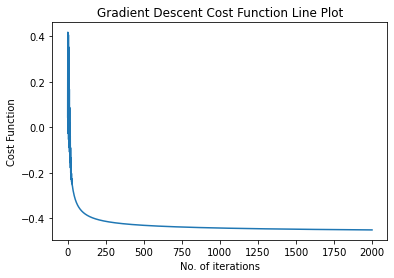

Precision: 0.96
Recall: 0.97
Accuracy: 0.96


In [72]:
log_reg_bgd = LogReg(X_train,y_train)
log_reg_bgd.fit(bgd=True)
log_reg_bgd.plot_cost_function()
precision_recall_acc(y_test,log_reg_bgd.predict(X_test),log_reg_bgd)